# PCA and senate voting data


In this problem, we are given the $m \times n$ data matrix $X$ with entries in $\{-1,0,1\}$, where each row corresponds to a senator and each column to a bill. We first import this data, print some relevant values, and normalize it as necessary to ready it for further computation.

To run this code, you'll need a number of standard Python libraries, all of which are installable via $\texttt{pip}$ or $\texttt{conda}$. We highly recommend using a [virtual environment](https://realpython.com/python-virtual-environments-a-primer/), for this class and in general.

Lastly, ensure that all data files ($\texttt{data_matrix.csv}$, $\texttt{politician_labels.txt}$, and $\texttt{vectors.txt}$) are located in folder $\texttt{senator_data_pca/}$ relative to to the current folder.

### Places you will need to modify this code are enclosed in a $\texttt{#TODO}$ block. You should not need to modify code outside these blocks to complete the problems. Questions that you are expected to answer in text are marked in <font color='red'>red</font>. For solution files, solutions will be presented in <font color='blue'>blue</font>.

In [1]:
# import the necessary packages for data manipulation, computation and PCA 
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

np.random.seed(7)

In [2]:
# import the data matrix
senator_df =  pd.read_csv('senator_data_pca/data_matrix.csv')
affiliation_file = open('senator_data_pca/politician_labels.txt', 'r')
affiliations = [line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()]
X = np.array(senator_df.values[:, 3:].T, dtype='float64') # transpose to get senators as rows
print('X.shape: ', X.shape)
n = X.shape[0] # number of senators
m = X.shape[1] # number of bills

X.shape:  (100, 542)


We observe that the number of rows, $n$, is the number of senators and is equal to 100. The number of columns, $m$, is the number of bills and is equal to 542. 

In [3]:
# print an example row of the data matrix
typical_row = X[0,:]
print(typical_row.shape)
print(typical_row)

(542,)
[ 1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  0. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  0.  0.  1.  1. -1.  1.
  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  0. -1. -1.  1.  1. -1.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  0.  1.  0. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

A row of $X$ consists of 542 entries -1 (senator voted against), 1 (senator voted for), or 0 (senator abstained), one for each bill. 

In [4]:
# print an example column of the data matrix
typical_column = X[:,0]
print(typical_column.shape)
print(typical_column)

(100,)
[ 1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1.
 -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.]


A column of $X$ consists of 100 entries in \{-1, 0, 1\}, one for each senator that voted on the bill.

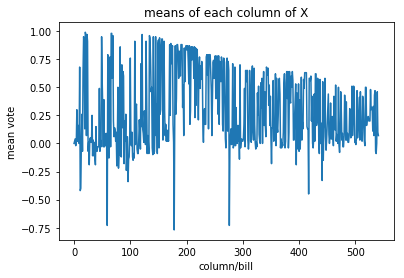

In [5]:
# compute the mean vote on each bill
X_mean = np.mean(X, axis = 0)
plt.plot(X_mean)
plt.title('means of each column of X')
plt.xlabel('column/bill')
plt.ylabel('mean vote')
plt.show()

We observe that the mean of the columns is not zero, so we center the data by subtracting the mean of each bill's vote from its respective column.

In [6]:
# center the data matrix
X_original = X.copy() # save a copy for part (d) and (e)
X = X - np.mean(X, axis = 0)

## a) Maximizing ${\rm var}(f(X,\vec{a}))$

In this problem, you are asked to find a unit-norm $m$-vector $\vec{a}$ maximizing variance ${\rm var}(f(X,\vec{a}))$.

We first provide a function to calculate the scores, $f(X,\vec{a})$.

In [7]:
# define score function
def f(X, a):
    return np.matmul(X,a)

Before we calculate the $\vec{a}$ that maximizes variance, let's observe what the scalar projections on a random direction $\vec{a}$ look like.

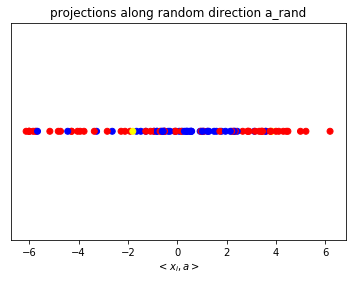

variance along random direction a_rand:  9.26745439089334


In [8]:
# generate a random direction and normalize the vector
a_rand = np.random.rand(542,1)
a_rand = a_rand/np.linalg.norm(a_rand)

# compute associated scores along a_rand
scores_rand = f(X, a_rand)

# visualize the scores along a_rand, coloring them by party affiliation
plt.scatter(scores_rand, np.zeros_like(scores_rand), c=affiliations)
plt.title('projections along random direction a_rand')
plt.xlabel('$<x_i, a>$')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

print('variance along random direction a_rand: ', scores_rand.var())

Note here that projecting along the random vector $\texttt{a_rand}$ does not explain much variance at all — data points are clustered together and intermixed across parties. It is clear that this direction does not give us any information about the senators' affiliations.

#### Fill in the code below to find direction $\texttt{a_1}$ that maximizes variance. Note that this will be the first principal component of $\texttt{X}$ .

(542, 1)


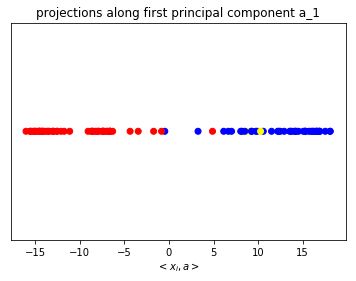

variance along first principal component:  149.74896507620736


In [22]:
################################################################################
### TODO: Calculate a_1, the first principal component of X.
# Hint: The PCA package imported from sklearn.decomposition will be useful here, 
# in particular the function pca.fit(). What should the dimensions of a_1 be?

pca = PCA()
pca.fit(X)
a_1 = pca.components_[0].reshape(-1,1) # this is the first principal component

print(a_1.shape)

# a_1 is large, but you can print it if you like
# print("first principal component a_1: ", a_1.T)

### end TODO
################################################################################
a_1 = a_1/np.linalg.norm(a_1)

# compute and visualize the scores along a_1
scores_a_1 = f(X, a_1)

plt.scatter(scores_a_1, np.zeros_like(scores_a_1), c=affiliations)
plt.title('projections along first principal component a_1')
plt.xlabel('$<x_i, a>$')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

print('variance along first principal component: ', scores_a_1.var())

If you computed $\texttt{a_1}$ correctly, you should observe that the variance is much higher than the $\texttt{a_rand}$ projection, and that blue and red dots are now spread in two clusters. This makes sense: the first principal component is the direction along which data varies most, and that is often along party lines. You just found a mathematical model for partisanship!

## b) Comparison to party averages

We observed above that the direction of maximum variance appears to be determined by party alignment; we now want to quantify how true that is by computing variance along vectors that describe the average position of each party. Specifically, we will compute variance along the following two vectors:

- $\texttt{a_mean_red}$: unit vector along the mean of rows of $\texttt{X}$ corresponding to ‘Red’ senators
- $\texttt{a_mean_blue}$: unit vector along the mean of rows of $\texttt{X}$ corresponding to ‘Blue’ senators

#### Fill in the code as indicated below to calculate these values and compute their relationships to $\texttt{a_1}$ and each other, then answer the interpretation question that follows.

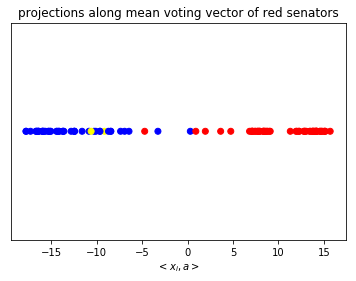

variance along mean voting vector of red senators:  148.8069996320572
dot product of a_mean_red and a_1:  -0.9965356912812973
angle between a_mean_red and a_1 (degrees):  175.2294178278024


In [10]:
################################################################################
### TODO: Calculate mu_red, the array of dimension (542, 1) whose values 
### are the mean across rows of X corresponding to 'Red' senators only.
# Hint: Print out the 'affiliations' variable and observe its contents.
# print(len(affiliations))
# print(affiliations)

X_red = X[np.array(affiliations) == 'Red', :]
mu_red = X_red.mean(axis=0, dtype='float64').reshape(-1, 1)

### end TODO
################################################################################

# normalize the vector to generate unit a_mean_red
a_mean_red = mu_red/np.linalg.norm(mu_red)

# compute and visualize the scores along a_mean_red
scores_mean_red = f(X, a_mean_red)

plt.scatter(scores_mean_red, np.zeros_like(scores_mean_red), c=affiliations)
plt.title('projections along mean voting vector of red senators')
plt.xlabel('$<x_i, a>$')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

print('variance along mean voting vector of red senators: ', scores_mean_red.var())

# check angle between mean voting vector of red senators and the first principal component
dot_product_red_a1 = float(np.dot(a_mean_red.T, a_1))
angle_red_a1 = np.arccos(dot_product_red_a1/(np.linalg.norm(a_mean_red)*np.linalg.norm(a_1)))*180/np.pi

print('dot product of a_mean_red and a_1: ', dot_product_red_a1)
print('angle between a_mean_red and a_1 (degrees): ', angle_red_a1)

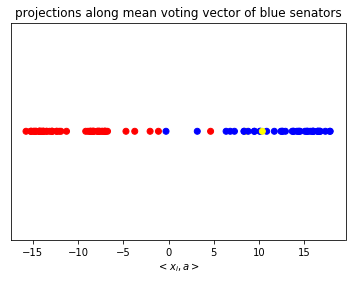

variance along mean voting vector of blue senators:  148.90884144004613
dot product of a_mean_blue and a_1:  0.9969831227823026
angle between a_mean_blue and a_1 (degrees):  4.451697983373863


In [11]:
################################################################################
### TODO: Calculate mu_blue, the array of dimension (542, 1) whose values 
### are the mean across rows of X corresponding to 'RBlue' senators only.
# Hint: Print out the 'affiliations' variable and observe its contents.
# print(len(affiliations))
# print(affiliations)

X_blue = X[np.array(affiliations) == 'Blue', :]
mu_blue = X_blue.mean(axis=0, dtype='float64').reshape(-1, 1)

### end TODO
################################################################################

# normalize the vector to generate unit a_mean_blue
a_mean_blue = mu_blue/np.linalg.norm(mu_blue)

# compute and visualize the scores along a_mean_blue
scores_mean_blue = f(X, a_mean_blue)

plt.scatter(scores_mean_blue, np.zeros_like(scores_mean_blue), c=affiliations)
plt.title('projections along mean voting vector of blue senators')
plt.xlabel('$<x_i, a>$')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

print('variance along mean voting vector of blue senators: ', scores_mean_blue.var())

# check angle between mean voting vector of red senators and the first principal component
dot_product_blue_a1 = float(np.dot(a_mean_blue.T, a_1))
angle_blue_a1 = np.arccos(dot_product_blue_a1/(np.linalg.norm(a_mean_blue)*np.linalg.norm(a_1)))*180/np.pi

print('dot product of a_mean_blue and a_1: ', dot_product_blue_a1)
print('angle between a_mean_blue and a_1 (degrees): ', angle_blue_a1)


In [12]:
# compute dot product of and angle between a_mean_red and a_mean_blue:
dot_product_blue_red = float(np.dot(a_mean_blue.T, a_mean_red))
angle_blue_red = np.arccos(dot_product_blue_red)*180/np.pi

print('dot product of a_mean_blue and a_mean_red: ', dot_product_blue_red)
print('angle between a_mean_blue and a_mean_red (degrees): ', angle_blue_red)


dot product of a_mean_blue and a_mean_red:  -0.9992350984093117
angle between a_mean_blue and a_mean_red (degrees):  177.75886458298191


### <font color='red'>TODO: Interpretation</font>
#### <font color='red'> Comment on the relationships between $\texttt{a_1}$, $\texttt{a_mean_red}$, and $\texttt{a_mean_blue}$ above based on their dot products and relative angles. What do these values tell you about how senators of a given party are likely to vote?
</font>

#### <font color='blue'> Because the magnitude of $\texttt{a_mean_red}$ and $\texttt{a_mean_blue}$ with $\texttt{a_1}$ is close to 1 and their relative angles are near 0/180°, we can conclude that the average party voting vector is a good approximation to the direction of maximum variance — i.e., party preference explains much of the variance in the data. Since the dot product of $\texttt{a_mean_red}$ and $\texttt{a_mean_blue}$ is almost -1, with a relative angle near 180°, we can conclude that they vote almost completely opposite to each other.
</font>

## c) Computing total variance 

We now wish to observe the variance of the data along the first two principal component axes.

#### Fill in the code below to calculate the total variance of the data along the first two principal components $\texttt{a_1}$ and $\texttt{a_2}$ and to plot the data on the corresponding axes.

In [13]:
# calculate C (see LaTeX problem for description)
X_bar = np.matmul(X.T, X)/n

################################################################################
### TODO: Calculate the total variance across a_1 and a_2.
# Hint: This value is equal to the sum of the two largest eigenvalues of X_bar.

eigenvals = np.linalg.eigvals(X_bar)[:2]
total_variance = (np.sum(np.abs(eigenvals)))

### end TODO
################################################################################

print('total variance explained by first two principal components: ', total_variance)


total variance explained by first two principal components:  175.17116160523167


Next, we calculate and plot the projection onto the plane spanned by the first two principal components.

(100, 2)


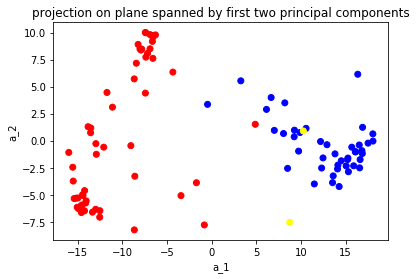

In [14]:
# calculate projected data matrix and observe its shape
pca = PCA(n_components=2)
projected = pca.fit_transform(X)
print(projected.shape)

# plot projected data matrix
plt.scatter(projected[:, 0], projected[:, 1], c=affiliations)
plt.xlabel('a_1')
plt.ylabel('a_2')
plt.title('projection on plane spanned by first two principal components')
plt.show()

## d) Finding bills that are the most/least contentious

We now wish to observe which bills are the most and least contentious — i.e., those for which most senators voted unanimously, and those for which support was most varied. We consider two possible ways of quantifying this relationship mathematically.

### Approach 1: Compute the variance of the columns of $X$

One option is to compute the variance of each column of $X$ — each of which corresponds to a particular bill — and use this variance as a measure of "contentiousness" (i.e., the more contentious a bill, the higher its variance in terms of senator vote count). Note that the variance of a particular bill in column $j$ can be viewed as the variance of scores along $\vec{e}_j$, where $\vec{e}_j$ is a basis vector whose $j^\textrm{th}$ entry is 1 and all others 0.

#### Fill in the code below to calculate the variance of $X$, extract the most and least contentious bills, and plot their vote counts, commenting on your results where indicated.

In [15]:
# calculate the variance of each column
list_variances = X.var(0)
bills = senator_df['bill_type bill_name bill_ID'].values

################################################################################
### TODO: Compute sorted_idx_variances, an np.array of shape (542,) containing
### integer entries that are the indices of variance scores in list_variances in
### decreasing order of variance. For example, if list_variances = [1, 3, 2, 4], 
### then sorted_idx_variances = np.array([3,1,2,0]).
# Hint: Use np.argsort().

sorted_idx_variances = np.flip(np.argsort(list_variances, axis=0), axis=0)

### end TODO
################################################################################

print(sorted_idx_variances.shape)

(542,)


Using this sorted index, we can now plot the vote counts for the top 5 highest and lowest variance bills.

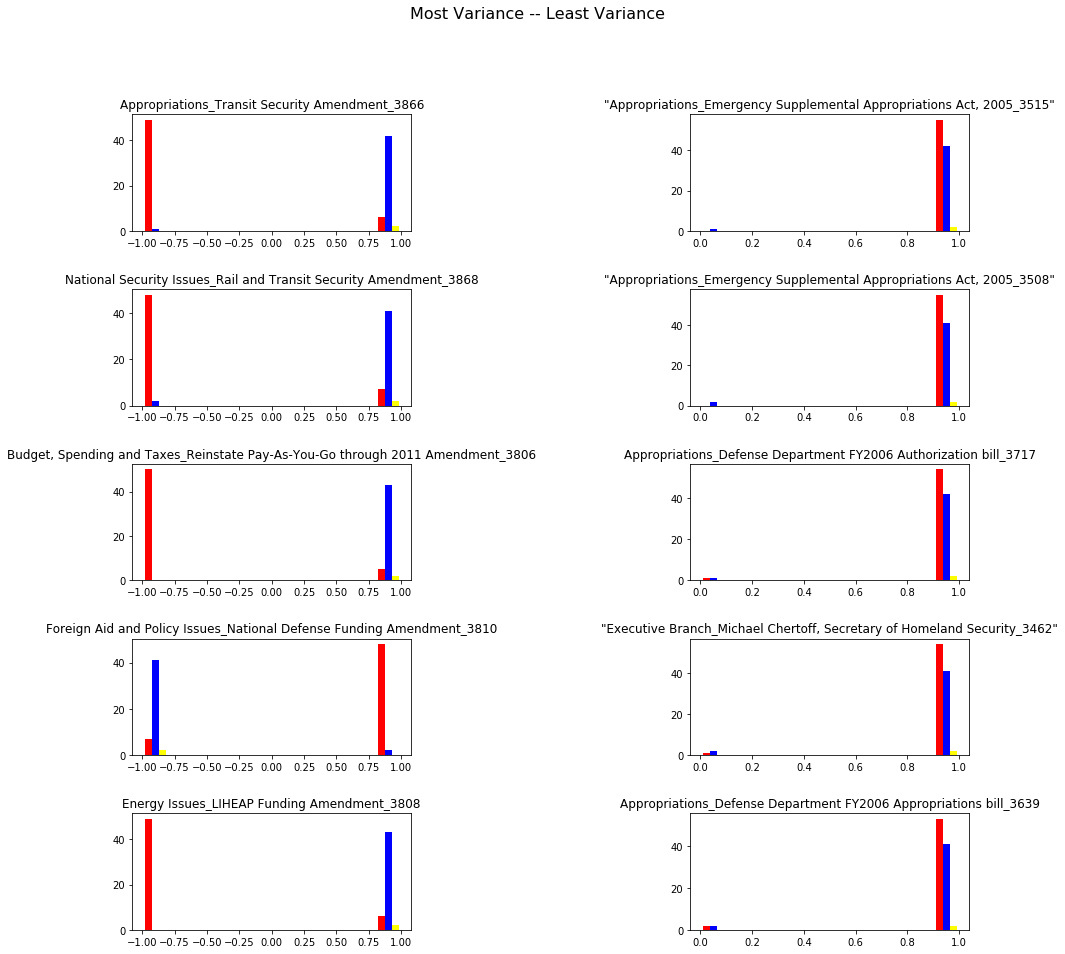

In [16]:
# retrieve the bills with the 5 highest and lowest variances
top_5 = [bills[sorted_idx_variances[i]] for i in range(5)]
bot_5 = [bills[sorted_idx_variances[-1-i]] for i in range(5)]

# set up figure with all desired subplots
fig, axes = plt.subplots(5,2, figsize=(15,15))

# plot highest variance bills
for i in range(5): 
    idx = sorted_idx_variances[i]
    
    # retrieve vote counts from original uncentered data matrix
    X_red_c = X_original[np.array(affiliations) == 'Red',idx]
    X_blue_c = X_original[np.array(affiliations) == 'Blue',idx]
    X_yellow_c = X_original[np.array(affiliations) == 'Yellow',idx]
    
    axes[i,0].hist([X_red_c, X_blue_c, X_yellow_c], color = ['red', 'blue', 'yellow'])
    axes[i,0].set_title(bills[idx])

# plot lowest variance bills
for i in range(1,6): 
    idx2 = sorted_idx_variances[-i]
    
    # retrieve vote counts from original uncentered data matrix
    X_red_c2 = X_original[np.array(affiliations) == 'Red',idx2]
    X_blue_c2 = X_original[np.array(affiliations) == 'Blue',idx2]
    X_yellow_c2 = X_original[np.array(affiliations) == 'Yellow',idx2]
    
    axes[i-1,1].hist([X_red_c2, X_blue_c2, X_yellow_c2], color = ['red', 'blue', 'yellow'])
    axes[i-1,1].set_title(bills[idx2])

plt.subplots_adjust(hspace=0.5, wspace = 1)    
fig.suptitle('Most Variance -- Least Variance', fontsize=16)
plt.show()


### <font color='red'>TODO: Interpretation</font>
#### <font color='red'> Comment on the voting trends you observe in the plots above. In general, if a vote is {contentious, uncontentious}, what do you expect the plots to look like?
</font>

#### <font color='blue'> In the bills with highest variance, 'Red' and 'Blue' senators tend to vote in opposite directions, with effectively no abstentions. In the bills with least variance, both 'Red' and 'Blue' senators vote for the bill such that is nearly unanimously passed. (This makes sense, since bills in the other low-variance cases — strong majority in abstention or against — would never make it to the senate floor.) Commentary on the particular nature of which bills are (un)contentious and why is left as an exercise to the reader.
</font>

We now consider a second possible metric for "contentiousness" and perform a similar computation.

### Approach 2: Project each bill's basis vector $\vec{e}_j$ onto $\vec{a}_1$

Instead of defining the most (least) contentious bills as those the of highest (lowest) variance, we can define them as those whose corresponding basis vectors $\vec{e}_j$ remain the largest (smallest) in magnitude when projected onto the first principal component $\vec{a}_1$. Note that this is equivalent to computing the inner product of $\vec{a}_1$ with each $\vec{e}_j$ and choosing those with highest (lowest) absolute value. Since we are taking inner products with standard basis vectors, this is equivalent to simply choosing the values of $\vec{a}_1$ with the largest (smallest) magnitude! (Think about what this implies about the definition of $\vec{a}_1$.)

We compute and plot the 5 most and least contentious bills by this metric below.

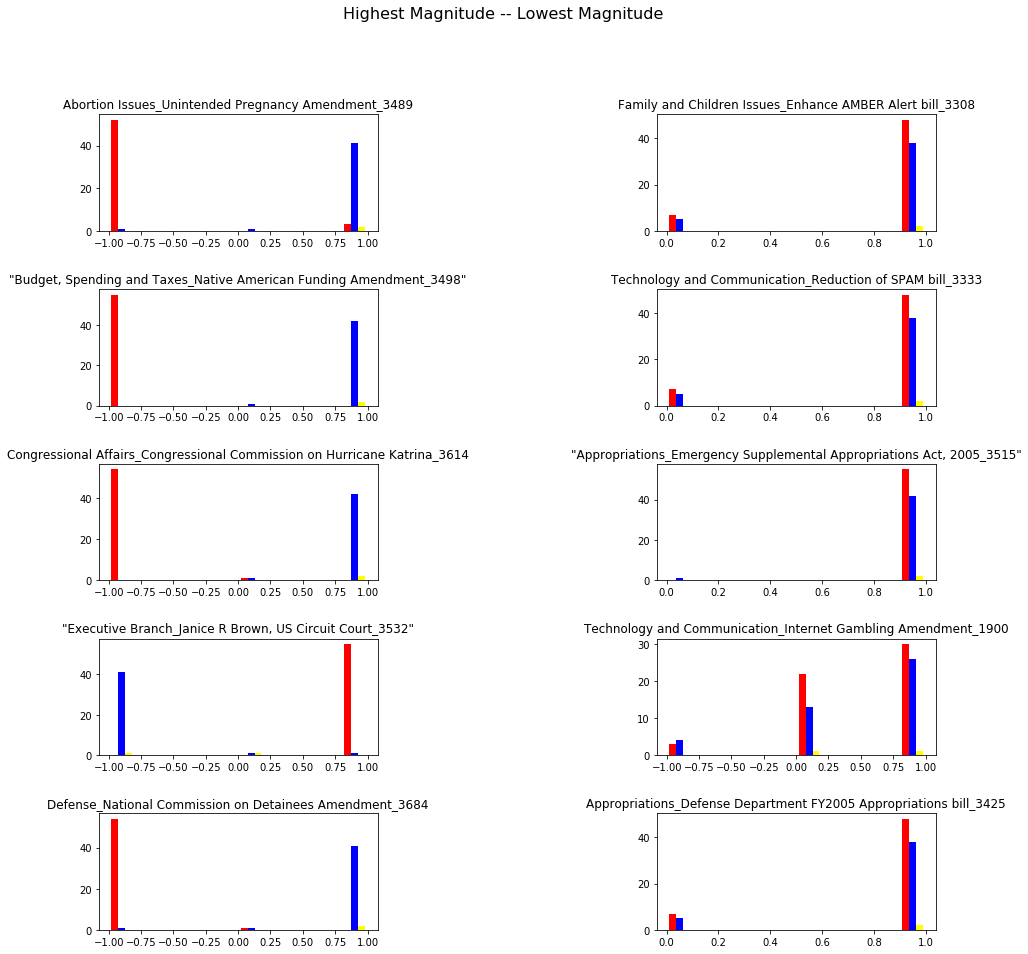

In [17]:
# flatten the first principal component a_1, then compute its absolute value
a_1_flat = np.ndarray.flatten(a_1)
abs_a_1 = np.abs(a_1_flat)

# find sorted indices of a_1 entry magnitudes in decreasing order
sorted_idxes = np.argsort(-abs_a_1)

# retrieve the bills with the 5 highest and lowest magnitudes
top_5_a1 = [bills[sorted_idxes[i]] for i in range(5)]
bot_5_a1 = [bills[sorted_idxes[-1-i]] for i in range(5)]

# set up figure with all desired subplots
fig, axes = plt.subplots(5,2, figsize=(15,15))

# plot highest magnitude bills
for i in range(5): 
    idx = sorted_idxes[i]

    # retrieve vote counts from original uncentered data matrix
    X_red_c = X_original[np.array(affiliations) == 'Red',idx]
    X_blue_c = X_original[np.array(affiliations) == 'Blue',idx]
    X_yellow_c = X_original[np.array(affiliations) == 'Yellow',idx]
    
    axes[i,0].hist([X_red_c, X_blue_c, X_yellow_c], color = ['red', 'blue', 'yellow'])
    axes[i,0].set_title(bills[idx])

# plot lowest magnitude bills
for i in range(1,6): 
    idx2 = sorted_idxes[-i]

    # retrieve vote counts from original uncentered data matrix
    X_red_c2 = X_original[np.array(affiliations) == 'Red',idx2]
    X_blue_c2 = X_original[np.array(affiliations) == 'Blue',idx2]
    X_yellow_c2 = X_original[np.array(affiliations) == 'Yellow',idx2]
    
    axes[i-1,1].hist([X_red_c2, X_blue_c2, X_yellow_c2], color = ['red', 'blue', 'yellow'])
    axes[i-1,1].set_title(bills[idx2])

plt.subplots_adjust(hspace=0.5, wspace = 1)    
fig.suptitle('Highest Magnitude -- Lowest Magnitude', fontsize=16)
plt.show()


### <font color='red'>TODO: Interpretation</font>
#### <font color='red'> Comment on the voting trends you observe in the plots above and how they compare to those calculated using variance. In general, if a vote is {contentious, uncontentious}, what do you expect the plots to look like?
</font>

#### <font color='blue'> In general, the voting trends we observe are the same as before; in high-magnitude bills, 'Red' and 'Blue' senators are split (with only a few more abstentions), and while one low-magnitude bill shows a significant number of abstentions, most unanimously passed, as before. This increase in abstentions means that the 5 highest (lowest) bills calculated via this projection magnitude have slightly lower (higher) variance than those calculated using variance directly.
</font>

Lastly, let us observe how many bills are considered most (least) contentious by both approaches.

In [18]:
# calculate number of bills considered most and least contentious by both approaches
print('number of common bills in top 5: ', len(np.intersect1d(top_5 ,top_5_a1)))
print('number of common bills in bottom 5: ', len(np.intersect1d(bot_5 ,bot_5_a1)))


number of common bills in top 5:  0
number of common bills in bottom 5:  1


### <font color='red'>TODO: Interpretation</font>
#### <font color='red'> Are the bills computed by the two methods the same? Why or why not?
</font>

#### <font color='blue'> The computed bills are not the same; only 1/10 overlaps. This is because the two approaches are fundamentally different: the first simply looks at the variance of senator votes for a single bill, while the second collects bills at the tails of the distribution along the first principal component, which takes into account the covariance of voting across different bills. The first is more straightforward, but the second incorporates data from senators' voting records, so that more "extreme" senators' views may skew the data less, for example.
</font>

## e) Finding extreme senators

Lastly, let us return to our initial definition of $f(X,\vec{a})$, which assigns each senator a score. We will now use this value computed along the first principal component $\vec{a}$ to assign the following classifications to our senators:

- Senators with the top 10 most positive scores and top 10 most negative scores are classified as *most extreme*.
- Senators with the 20 scores closest to 0 are classified as *least extreme*.

In the final subproblem, we observe these scores and how they relate to party affiliation.

We first compute the most extreme senators:

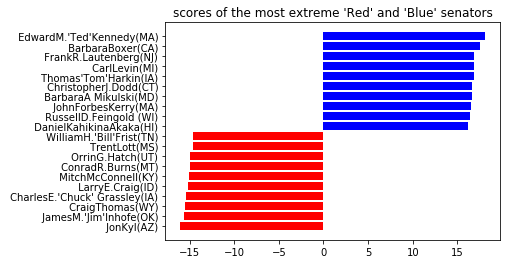

In [19]:
# extract senator names
senators = senator_df.columns.values[3:]

# compute and sort senators scores and corresponding affiliations
senator_scores = f(X,a_1)[:,0]
complete_sort_indices = np.argsort(senator_scores)
sort_indices = np.hstack([complete_sort_indices[:10], complete_sort_indices[-11:-1]])
senators_sorted = senators[sort_indices]
senator_scores_sorted = senator_scores[sort_indices]
affiliations = np.array(affiliations)
affiliations_sorted = affiliations[sort_indices]

plt.barh(y = senators_sorted, width = senator_scores_sorted, color = affiliations_sorted)
plt.title('scores of the most extreme \'Red\' and \'Blue\' senators')
plt.show()


And the least extreme senators:

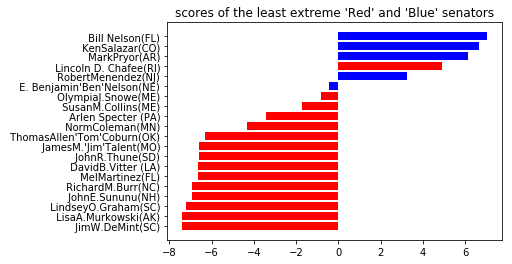

In [20]:
# compute and sort senators scores and corresponding affiliations
senator_scores = f(X,a_1)[:,0]
complete_sort_indices = np.argsort(np.abs(senator_scores))[:20]
senator_scores_le= senator_scores[complete_sort_indices]
senators_le = senators[complete_sort_indices]
affiliations = np.array(affiliations)
affiliations_le = affiliations[complete_sort_indices]
sort_indices = np.argsort(senator_scores_le)
senators_sorted = senators_le[sort_indices]
senator_scores_sorted = senator_scores_le[sort_indices]
affiliations_sorted = affiliations_le[sort_indices]

plt.barh(y = senators_sorted, width = senator_scores_sorted, color = affiliations_sorted)
plt.title('scores of the least extreme \'Red\' and \'Blue\' senators')
plt.show()

### <font color='red'>TODO: Interpretation</font>
#### <font color='red'> Comment on the sign of senators' scores and what they say about party affiliation for both the most and least extreme senators. (Bonus: Can you locate some of the senators on your PCA projection plot in part (a) above?)
</font>

#### <font color='blue'> This data is consistent with all previous observations that scores computed along the first principal component are a good indicator of party affiliation: the most extreme positive and negative scores all belong to 'Blue' and 'Red' senators, respectively. When we observe less extreme senators, whose scores are closer to zero, we start to see some overlap, but with only 2 exceptions, the sign of the senators' $\vec{a}_1$ projections accurately predict partisan affiliation. Those senators that deviate are the easiest to spot on the projection plot!
</font>